<a href="https://colab.research.google.com/github/Mokhelelitsholo/Mokhelelitsholo/blob/main/German_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load the librarys
import pandas  as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')

#Importing the data
df = pd.read_csv("German.csv")

# Descriptive Statistics

In [2]:
#Descriptive Statistics
round(df.describe(),2)

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.00,1000.00,1000.00,1000.00,1000.00
mean,499.50,35.55,1.90,3271.26,20.90
std,288.82,11.38,0.65,2822.74,12.06
min,0.00,19.00,0.00,250.00,4.00
25%,249.75,27.00,2.00,1365.50,12.00
50%,499.50,33.00,2.00,2319.50,18.00
75%,749.25,42.00,2.00,3972.25,24.00
max,999.00,75.00,3.00,18424.00,72.00


In [3]:
#Looking the data
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
# check data size and Missings values,type of data 

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None


In [5]:
#Looking unique values

print(df.nunique())

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64


In [6]:
#Get the numbers of missing values in each column
missing = df.isnull().sum()

#Get the percentage of missing values in each column
missing_pct = round(df.isnull().sum()/len(df) * 100, 1)

data_missing = pd.concat([missing, missing_pct], axis=1)
data_missing.columns = ["Num", "Pct"]
print(data_missing)

                  Num   Pct
Unnamed: 0          0   0.0
Age                 0   0.0
Sex                 0   0.0
Job                 0   0.0
Housing             0   0.0
Saving accounts   183  18.3
Checking account  394  39.4
Credit amount       0   0.0
Duration            0   0.0
Purpose             0   0.0
Risk                0   0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


#Data Preprocessing

In [8]:
# We need to produce a new dataset (df_credit) for prediction model construction

# 1. We need to convert the target varaible Risk into a numerical.
# 2. We need to split df_credit into predict varible and dependent varaible.
# 3. we do some individual varaible transforamtion, fill missing data

#Importing the data
df = pd.read_csv("German.csv",index_col=0)

df_credit = df

In [9]:
#Change Risk column (target variable) into numerical with 0 and 1 values

df_y = df[['Risk']]
df_y['Risk'] = np.where(df_y.loc[ : , 'Risk']=='good', 0, 1)
df_y.head()
df_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Risk    1000 non-null   int64
dtypes: int64(1)
memory usage: 15.6 KB


In [10]:
# Prepare predictor table

df_credit = df_credit.drop(["Risk"], axis=1)
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


count        817
unique         4
top       little
freq         603
Name: Saving accounts, dtype: object


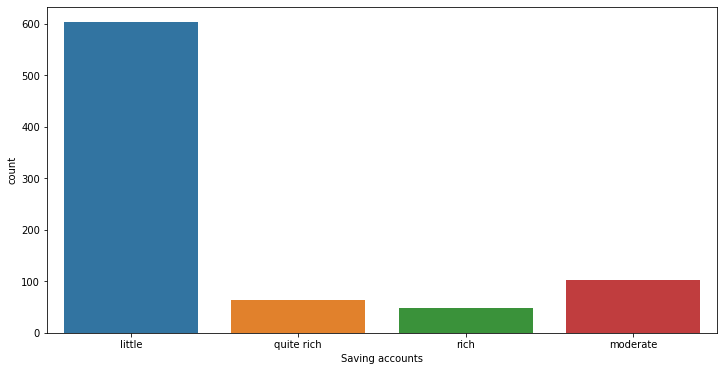

In [11]:
# Deal with missing values

print(df_credit['Saving accounts'].describe())

plt.figure(figsize=(12,6))
sns.countplot(x='Saving accounts',data = df_credit)

plt.show()

In [12]:
# Assign missing vlaue with little because it is the majority in the dataset

df_credit['Saving accounts'].fillna('little', inplace = True)
df_credit['Saving accounts'].describe()

count       1000
unique         4
top       little
freq         786
Name: Saving accounts, dtype: object

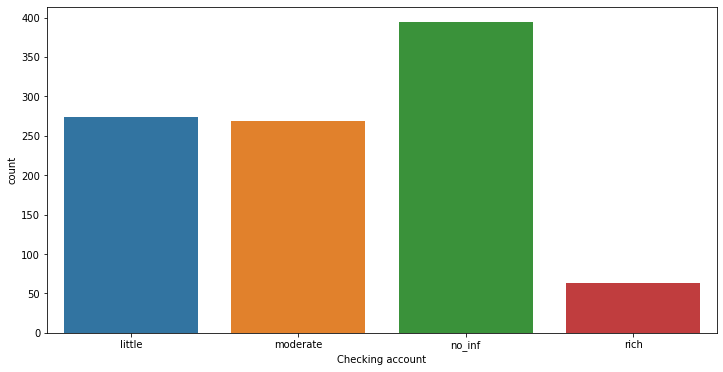

In [13]:
# fill the missing value with a category made up category called "No_info"

df_credit['Checking account'].fillna('no_inf', inplace=True)
df_credit['Checking account'].head()

#df_credit['Checking account'].describe()
plt.figure(figsize=(12,6))
sns.countplot(x='Checking account',data=df_credit)

The numerical varaibles are all skewed to the left. They will affact most of ML models.

We need to normalise them by performming a log transformation before using these features in our modelling.

In [14]:
# Log transform function
def log_transform(data, to_log):
    X = data.copy()
    for item in to_log:
        # Add 1 to the data to prevent infinity values
        X[item] = np.log(1+X[item])
    return X

In [15]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns = categorical_columns, dummy_na = nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df

Transfer all object and category variables into numberical

Reasons

1. Most of the prediction models need predictor to be numberical.
2. For correclation analysis we need attributres ot be numberical.

In [16]:
# log transfer

df_credit = log_transform(df_credit, ['Age', 'Credit amount', 'Duration'])

In [17]:
# do transformation on df-credit

df_credit_T = one_hot_encoder(df_credit)
print(df_credit_T.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1000 non-null   float64
 1   Job                          1000 non-null   int64  
 2   Credit amount                1000 non-null   float64
 3   Duration                     1000 non-null   float64
 4   Sex_female                   1000 non-null   uint8  
 5   Sex_male                     1000 non-null   uint8  
 6   Housing_free                 1000 non-null   uint8  
 7   Housing_own                  1000 non-null   uint8  
 8   Housing_rent                 1000 non-null   uint8  
 9   Saving accounts_little       1000 non-null   uint8  
 10  Saving accounts_moderate     1000 non-null   uint8  
 11  Saving accounts_quite rich   1000 non-null   uint8  
 12  Saving accounts_rich         1000 non-null   uint8  
 13  Checking account_li

In [18]:
#concat the df_credit with df_y 

data_train = pd.concat([df_credit_T, df_y], axis=1)
data_train.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
0,4.219508,2,7.064759,1.945910,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,3.135494,2,8.691483,3.891820,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
2,3.912023,1,7.648263,2.564949,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,3.828641,2,8.972464,3.761200,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,3.988984,2,8.491055,3.218876,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


# Model constrution

After this basic data preprocessing, we have produced a new data set ready for to be used for our model constrution.

1. df_credit_T: Dataset only contains independent variables after normalisation
2. df_y: dataset only has the dependent varaible "Risk" and only has 0 and 1
3. data_train: has both of them

Prediciton Model Construction and Evaluation

Im going to use the following Python Sklearn models:


*   SVC
*   Gaussian Naive Bayes
*   Decision Tree Classifier
*   XGBClassifier
*   K-Nearest Neighbors Classifier



In [19]:
# liberary loading
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [20]:
X = df_credit_T
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Modal: SVM has 0.716 accuracy
Modal: NB has 0.652 accuracy
Modal: DT has 0.656 accuracy
Modal: XGB has 0.736 accuracy
Modal: KNN has 0.712 accuracy



<Figure size 792x432 with 0 Axes>

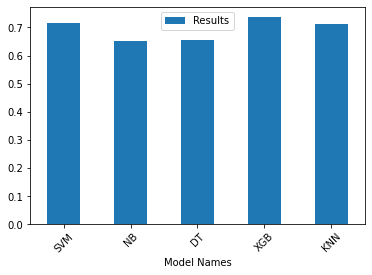

In [21]:
# to feed the random state
seed = 42

# prepare models
models = []
models.append(('SVM', SVC(gamma='auto')))
models.append(('NB', GaussianNB()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        model.fit(X_train, y_train)
        pre_results = model.predict(X_test)
        model_acc = accuracy_score(y_test, pre_results)
        names.append(name)
        results.append(model_acc)
        print(f"Modal: {name} has {model_acc} accuracy")      

# boxplot algorithm comparison
results_df = pd.DataFrame({'Model Names':names, 'Results':results})

print()

#print(results_df)
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')

results_df.plot.bar(x='Model Names',rot=45)

plt.show()

Findings:

- all models have pretty low accuracy
- some models perform a liitle better than others

 Prediciton model fine tune

 To improve model’s prediction is generally focused on two aspects:

1. Increase the samples' quality
> The samples used in the model training have a bid effect on the model's performance. Using proper numbers of properties and the appropriate property can increase the model's accuracy and increase the training cost. The most 2 popular methods used for property selection are Correlation analysis and the K-fold cross-validation.

2. Adjust models' parameters



 Features selection
 For any prediction model, feature selection is important. It affects the model's performance by:
1. The number of properties used (not the more, the better). 
2. which property to use (not use the correlated ones). 

The two general methods used are:

*   Correlation analysis
*   PCA analysis




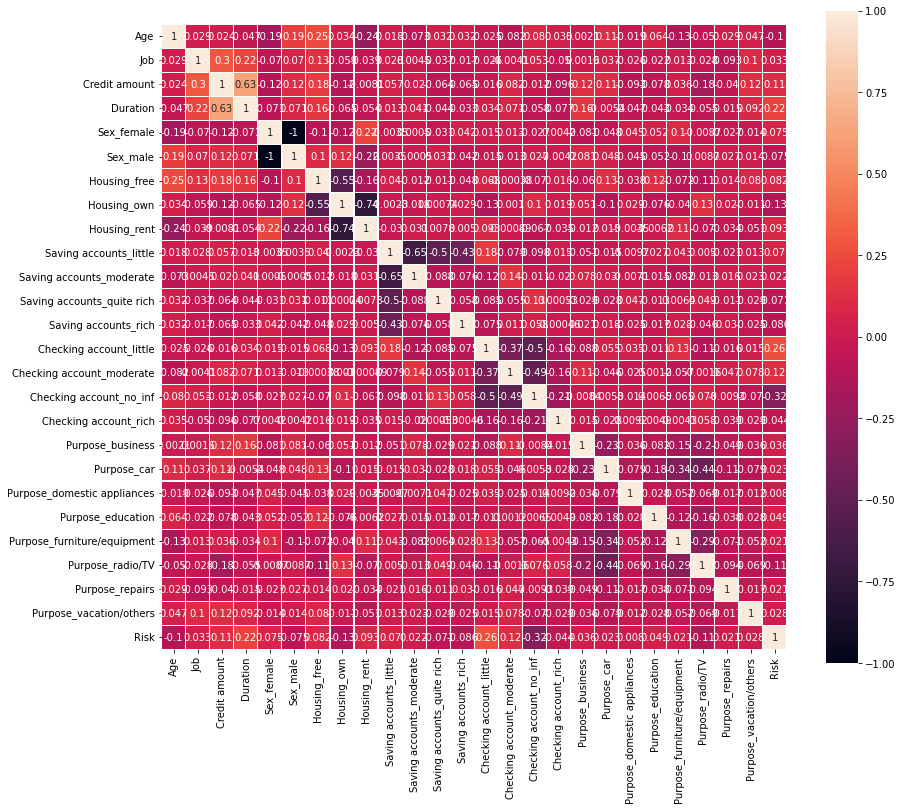

In [22]:
# Correlation analysis of on the data_train rather than df_credit_T
# Because we want see the correlation with Risk 

plt.figure(figsize=(14,12))
sns.heatmap(data_train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

The above correlation heatmap shows the correlations among the variables. Apart from the correlations between variables, Our attention should focus on the correlation between the predictor variables and the correlation between predictors and the target variable, Risk.

Findings:
1. The most positive correlation with Risk is: Checking account_little, Duration, saving account little, house_rent and Credit_amount.
2. Checking account_no_info has a negative on the Risk.
3. Correlation analysis provides basic information on the connections between predictors and the target variable.

In [23]:
# show the most influenced variables

var_importance = data_train.corrwith(data_train["Risk"]).abs()
var_importance.sort_values(ascending=False)

Risk                           1.000000
Checking account_no_inf        0.322436
Checking account_little        0.258333
Duration                       0.215280
Housing_own                    0.134589
Checking account_moderate      0.119581
Credit amount                  0.109588
Purpose_radio/TV               0.106922
Age                            0.102463
Housing_rent                   0.092785
Saving accounts_rich           0.085749
Housing_free                   0.081556
Sex_female                     0.075493
Sex_male                       0.075493
Saving accounts_quite rich     0.070954
Saving accounts_little         0.070234
Purpose_education              0.049085
Checking account_rich          0.044009
Purpose_business               0.036129
Job                            0.032735
Purpose_vacation/others        0.028058
Purpose_car                    0.022621
Saving accounts_moderate       0.022255
Purpose_furniture/equipment    0.020971
Purpose_repairs                0.020828


Findings:

We can decide how many and which parameters to use with this order.

PCA Analysis

With PCA, we can also find the number of features required to explain the variance in all candidate features. We have 25 features that can potentially be predictors. Let us see their prediction power over the target variable.

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
n=25
columns=['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 
         'PCA_8', 'PCA_9', 'PCA_10', 'PCA_11', 'PCA_12','PCA_13','PCA_14',
         'PCA_15', 'PCA_16', 'PCA_17', 'PCA_18', 'PCA_19', 'PCA_20', 'PCA_21', 
         'PCA_22', 'PCA_23', 'PCA_24', 'PCA_25'
        ]

PCA is affected by scale. So we need to scale the features in our data before applying PCA. The scale is done by using StandardScaler. It can standardize the dataset’s features onto a unit scale (mean = 0 and variance = 1), a requirement for the optimal performance of many machine learning algorithms.

In [25]:
# Standardizing the features
# df_credit_T is the origianl dataset applied 
X = StandardScaler().fit_transform(df_credit_T)

In [26]:
# Create the PCA instance and fit and transform the data with pca
pca = PCA(n_components=n)
pc = pca.fit_transform(X)
df_pc = pd.DataFrame(pc, columns=columns)
df_pc.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25
0,-0.600711,-1.278510,-2.366800,0.741020,-1.218156,-0.144496,-0.557211,0.373424,1.023033,-0.409206,...,0.536494,-1.240949,-1.084859,1.434267,0.618480,-1.574438e-15,-5.206156e-15,3.481404e-16,1.560635e-15,-7.790059e-17
1,1.039185,0.401693,0.447350,-3.259128,0.887142,-1.365429,-0.413454,-0.413842,1.065483,-0.099424,...,-0.892951,0.336264,0.605081,-0.235964,-0.003262,-2.744729e-16,7.493516e-16,1.458650e-15,1.466017e-15,-2.378389e-16
2,-0.719277,-1.304296,-1.229190,1.247007,0.258864,-1.267335,-0.415921,1.373027,-2.335661,-0.925452,...,-0.183524,1.534062,1.042763,1.064686,0.400208,-5.787976e-17,-1.834610e-15,4.958839e-17,3.845531e-16,-4.929519e-17
3,-1.471888,3.497006,-0.715704,0.524794,-0.058882,1.139820,-0.754233,2.234971,0.386154,0.138861,...,-0.552599,-1.620929,1.067809,-0.262236,0.013491,1.483929e-15,6.460745e-16,6.341452e-16,-6.769278e-17,-1.189507e-16
4,-1.871967,3.078152,-0.709569,2.127638,-0.637485,-0.643114,0.301065,0.431371,0.768894,-0.140053,...,-0.103138,-1.132354,0.341589,-0.346131,0.226346,7.253392e-15,3.686203e-15,-2.527994e-15,3.272468e-15,1.828142e-15


The DataFrame df_pc shows the explained variance, which is the information (variance) attributed by each of the principal components. It this important that we know how much information contribution can be accumulated by a number of the principle components together. PCA.explained_varianceratio tell us the percentage (importance) of each PC. Notice that this analysis does not link predictors with the target variable.

In [27]:
pca.explained_variance_ratio_

array([9.97973265e-02, 9.26018895e-02, 7.98091938e-02, 6.84952199e-02,
       6.12068957e-02, 5.61772064e-02, 5.48306165e-02, 4.97029669e-02,
       4.78034574e-02, 4.40624541e-02, 4.35753445e-02, 4.14294789e-02,
       4.08266148e-02, 3.93405672e-02, 3.86724483e-02, 3.67979494e-02,
       3.44938726e-02, 3.04768911e-02, 2.65751092e-02, 1.33244973e-02,
       1.85857622e-32, 9.36309191e-33, 7.42902894e-33, 2.05798821e-33,
       2.45860213e-34])

Finding: 

Explained_varianceratio tells us that the first principal component contains 9.98% of the variance, and the second principal component contains 9.26%. Together, the two components contain nearly 20% of the information.

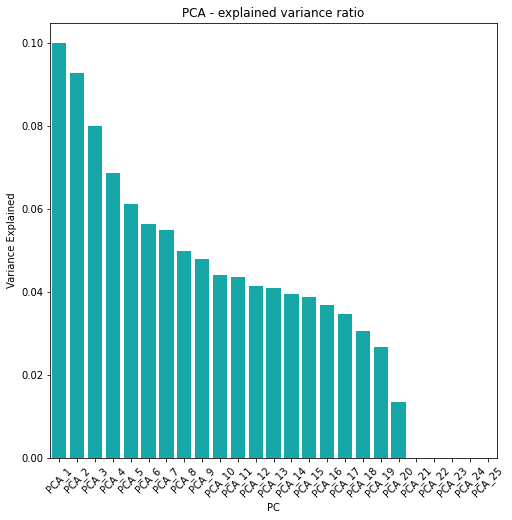

In [28]:
# Create a DataFrame for visulisation
pca_df = pd.DataFrame({'Variance Explained':pca.explained_variance_ratio_,
             'PC':df_pc.columns})

plt.figure(figsize=(8, 8))
plt.title('PCA - explained variance ratio')
# Plot DataFrame
sns.barplot(x='PC',y='Variance Explained', 
           data=pca_df, color="c")
plt.xticks(rotation=45)
plt.show()

Plot the cumulated (variance) information contribution

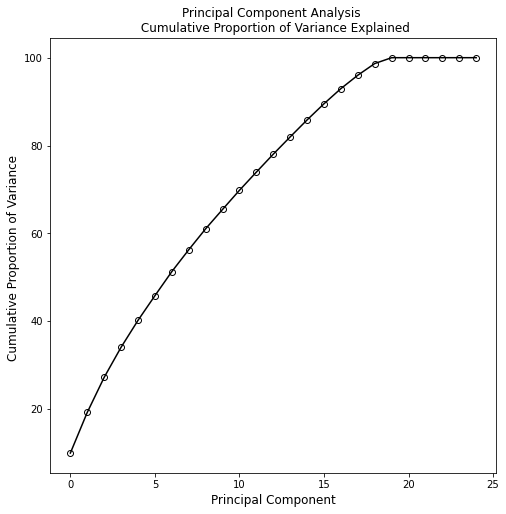

In [29]:
plt.figure(figsize=(8, 8))
# Instantiate, fit and transform

var = pca.explained_variance_ratio_

# Plot cumulative variance
cumulative_var = np.cumsum(var)*100
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis \n Cumulative Proportion of Variance Explained',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance ",fontsize=12)
plt.show()

Finding:

From the plots above, we see that approximately 17 features are needed to explain 90% of the variance in the dataset. This gives us a good intuition of the number of features required in our model.

For the minimum number of predictors to achieve the best performance, the number of predictors is 20. With correlation analysis, we can choose the 20 predictors.


---

Next: Assess models' performance after features selection


In [30]:
# Data preparation
X = df_credit_T.drop(['Purpose_car', 'Saving accounts_moderate', 'Purpose_furniture/equipment', 'Purpose_repairs', 'Purpose_domestic appliances'], axis=1)
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Modal: SVM has 0.728 accuracy
Modal: NB has 0.668 accuracy
Modal: DT has 0.668 accuracy
Modal: XGB has 0.728 accuracy
Modal: KNN has 0.712 accuracy



<Figure size 792x432 with 0 Axes>

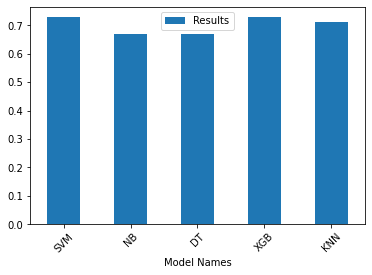

In [31]:
# to feed the random state
seed = 42

# prepare models
models = []
models.append(('SVM', SVC(gamma='auto')))
models.append(('NB', GaussianNB()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        model.fit(X_train, y_train)
        pre_results = model.predict(X_test)
        model_acc = accuracy_score(y_test, pre_results)
        names.append(name)
        results.append(model_acc)
        print(f"Modal: {name} has {model_acc} accuracy")      

# boxplot algorithm comparison
results_df = pd.DataFrame({'Model Names':names, 'Results':results})

print()

#print(results_df)
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')

results_df.plot.bar(x='Model Names',rot=45)

plt.show()

Findings:

We can see after select predictors the noice has been reduced, so all models' performace has been improved.

Fine tune RF Hyper Parameters with K-fold CV

Cross Validation is an important method in Machine Learning and model construction. In k-fold CV, the training set is split into k smaller sets. The following procedure is followed for each of the k “folds”:

A model is trained (constructed) using the folds as training data;

The model is then validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is the average of the values computed in the loop.

This approach can be computationally expensive but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage where the number of samples is very small.

In [32]:
# Data preparation
X = df_credit_T.drop(['Purpose_car', 'Saving accounts_moderate', 'Purpose_furniture/equipment', 'Purpose_repairs', 'Purpose_domestic appliances'], axis=1)
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

SVM accuracy= 0.713  and sd = 0.042)
NB accuracy= 0.691  and sd = 0.068)
DT accuracy= 0.636  and sd = 0.041)
XGB accuracy= 0.743  and sd = 0.041)
KNN accuracy= 0.701  and sd = 0.038)


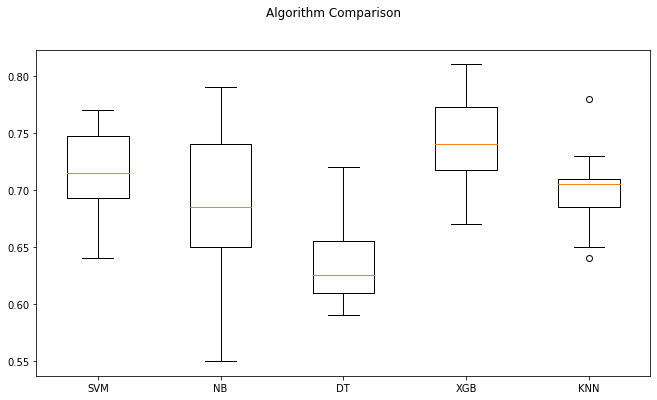

In [33]:
# Data preparation
X = df_credit_T.drop(['Purpose_car', 'Saving accounts_moderate', 'Purpose_furniture/equipment', 'Purpose_repairs', 'Purpose_domestic appliances'], axis=1)
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# to feed the random state
seed = 42

# prepare models
models = []

models.append(('SVM', SVC(gamma='auto')))
models.append(('NB', GaussianNB()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
validates = []
names = []
scoring = 'accuracy'

for name, model in models:
        
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s accuracy= %0.3f  and sd = %0.3f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)  
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


Finding:

All models' performance has been improved with K=10 fold CV.

K-fold CV is useful to eliminate overfitting.
This can be confirmed by using cross_validate, which we can export the training and the testing accuracy. The training accuracy is the mean accuracy on the X_train and y_train, and the test accuracy is the accuracy on X_test and y_test. That is the accuracy we used in the previous evaluation.

Model SVM has: 0.735 train accuracy, 0.713 test accuracy
Model NB has: 0.701 train accuracy, 0.691 test accuracy
Model DT has: 1.000 train accuracy, 0.635 test accuracy
Model XGB has: 0.846 train accuracy, 0.743 test accuracy
Model KNN has: 0.802 train accuracy, 0.701 test accuracy



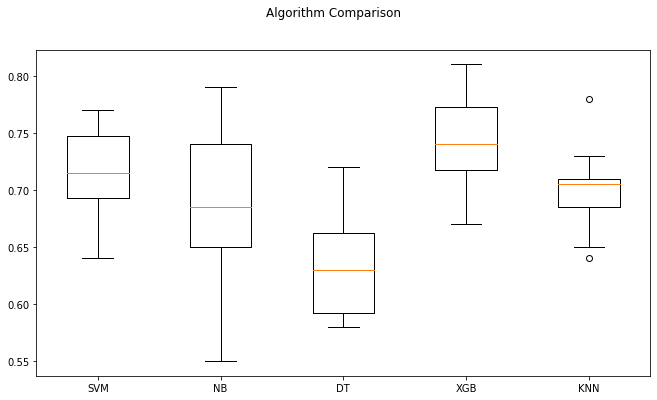

In [34]:
from sklearn.model_selection import cross_validate
# to feed the random state
seed = 42

# prepare models
models = []
models.append(('SVM', SVC(gamma='auto')))
models.append(('NB', GaussianNB()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
validates = []
names = []
scoring = 'accuracy'

for name, model in models:
        
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        CV_results = cross_validate(model, X, y, cv=kfold, return_train_score=True)
        model_acc = CV_results['train_score']
        model_val = CV_results['test_score']
        validates.append(model_val) 
        names.append(name)
        results.append(model_acc)
        msg = "Model %s has: %0.3f train accuracy, %0.3f test accuracy" % (name, model_acc.mean(), model_val.mean())
        print(msg)      

print()
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(validates)
ax.set_xticklabels(names)
plt.show()

Finding: 

We can see that all models has a sligh higher accuracy on the training and a lower accuracy on test. It shows all our models has "overfitting"

Model fine tune with proper Hyperparameter setting

All models used so far take default parameters. It is a common practice to fine-tune hyperparameters for models used in the final prediction. 

1. We are using GridSearchCV to tune the model by searching for the best hyperparameters and keeping the classifier with the highest recall score.

2. Adjust the decision threshold using the precision-recall and the roc curves, which is a more involved method I will walk through.

# Randomized Search Cross validation 

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.metrics import mean_squared_error
from scipy.stats import randint

# Support Vector Machine

In [43]:
svmModel =  SVC(gamma="scale")

svm_param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
svm_rnd_search_cv = RandomizedSearchCV(svmModel, svm_param_distributions, n_iter=10, verbose=2, cv=3)

svm_rnd_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=4.638701214932408, gamma=0.001031739669341076; total time=   0.0s
[CV] END ....C=4.638701214932408, gamma=0.001031739669341076; total time=   0.0s
[CV] END ....C=4.638701214932408, gamma=0.001031739669341076; total time=   0.0s
[CV] END ....C=7.824705624858519, gamma=0.034343109066578274; total time=   0.0s
[CV] END ....C=7.824705624858519, gamma=0.034343109066578274; total time=   0.0s
[CV] END ....C=7.824705624858519, gamma=0.034343109066578274; total time=   0.0s
[CV] END ....C=8.822976750345298, gamma=0.035966872737595794; total time=   0.0s
[CV] END ....C=8.822976750345298, gamma=0.035966872737595794; total time=   0.0s
[CV] END ....C=8.822976750345298, gamma=0.035966872737595794; total time=   0.0s
[CV] END ...C=3.1789858061455467, gamma=0.006651285486978009; total time=   0.0s
[CV] END ...C=3.1789858061455467, gamma=0.006651285486978009; total time=   0.0s
[CV] END ...C=3.1789858061455467, gamma=0.006651

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f54d54e4950>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f54d5926110>},
                   verbose=2)

In [44]:
svm_rnd_search_cv.best_estimator_

SVC(C=9.480966142562474, gamma=0.07345518181694705)

In [45]:
svm_rnd_search_cv.best_score_

0.7200000000000001

In [46]:
svm_rnd_search_cv.best_estimator_.fit(X_train, y_train)

SVC(C=9.480966142562474, gamma=0.07345518181694705)

In [47]:
svm_y_pred = svm_rnd_search_cv.best_estimator_.predict(X_train)
svm_mse = mean_squared_error(y_train, svm_y_pred)
np.sqrt(svm_mse)

0.4381780460041329

In [48]:
svm_y_pred = svm_rnd_search_cv.best_estimator_.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_y_pred)
np.sqrt(svm_mse)

0.4979959839195493

In [49]:
svm_y_pred = svm_rnd_search_cv.best_estimator_.predict(X_test)
print(accuracy_score(y_test,svm_y_pred))
print("\n")
print(confusion_matrix(y_test, svm_y_pred))
print("\n")
print(classification_report(y_test, svm_y_pred))

0.752


[[157  21]
 [ 41  31]]


              precision    recall  f1-score   support

           0       0.79      0.88      0.84       178
           1       0.60      0.43      0.50        72

    accuracy                           0.75       250
   macro avg       0.69      0.66      0.67       250
weighted avg       0.74      0.75      0.74       250



# Naive Bayes


In [64]:
nbModel =  GaussianNB()

nb_param_distributions = {'var_smoothing': np.logspace(0,-9, num=100)}

nb_rnd_search_cv = RandomizedSearchCV(nbModel, nb_param_distributions, n_iter=10, verbose=2, cv=3)

nb_rnd_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ................var_smoothing=6.579332246575682e-08; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575682e-08; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575682e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ...............var_smoothing=5.3366992312063123e-05; total time=   0.0s
[CV] END ...............var_smoothing=5.3366992312063123e-05; total time=   0.0s
[CV] END ...............var_smoothing=5.3366992312063123e-05; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smo

RandomizedSearchCV(cv=3, estimator=GaussianNB(),
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   verbose=2)

In [65]:
nb_rnd_search_cv.best_estimator_

GaussianNB(var_smoothing=0.3511191734215131)

In [66]:
nb_rnd_search_cv.best_score_

0.7319999999999999

In [67]:
nb_rnd_search_cv.best_estimator_.fit(X_train, y_train)

GaussianNB(var_smoothing=0.3511191734215131)

In [68]:
nb_y_pred = nb_rnd_search_cv.best_estimator_.predict(X_train)
nb_mse = mean_squared_error(y_train, nb_y_pred)
np.sqrt(nb_mse)

0.5163977794943222

In [69]:
nb_y_pred = nb_rnd_search_cv.best_estimator_.predict(X_test)
nb_mse = mean_squared_error(y_test, nb_y_pred)
np.sqrt(nb_mse)

0.5253570214625479

In [70]:
nb_y_pred = nb_rnd_search_cv.best_estimator_.predict(X_test)
print(accuracy_score(y_test,nb_y_pred))
print("\n")
print(confusion_matrix(y_test, nb_y_pred))
print("\n")
print(classification_report(y_test, nb_y_pred))

0.724


[[159  19]
 [ 50  22]]


              precision    recall  f1-score   support

           0       0.76      0.89      0.82       178
           1       0.54      0.31      0.39        72

    accuracy                           0.72       250
   macro avg       0.65      0.60      0.61       250
weighted avg       0.70      0.72      0.70       250



# Decision Tree


In [81]:
dtModel = DecisionTreeClassifier()

dt_param_distributions = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy", "log_loss"]}

dt_rnd_search_cv = RandomizedSearchCV(dtModel, dt_param_distributions, n_iter=10, verbose=2, cv=3)

dt_rnd_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_features=2, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_features=2, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_features=2, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=4, min

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f54d5821610>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f54d5824050>},
                   verbose=2)

In [82]:
dt_rnd_search_cv.best_estimator_

DecisionTreeClassifier(max_features=4, min_samples_leaf=8)

In [83]:
dt_rnd_search_cv.best_score_

0.6973333333333334

In [84]:
dt_rnd_search_cv.best_estimator_.fit(X_train, y_train)

DecisionTreeClassifier(max_features=4, min_samples_leaf=8)

In [85]:
dt_y_pred = dt_rnd_search_cv.best_estimator_.predict(X_train)
dt_mse = mean_squared_error(y_train, dt_y_pred)
np.sqrt(dt_mse)

0.4774934554525329

In [86]:
dt_y_pred = dt_rnd_search_cv.best_estimator_.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_y_pred)
np.sqrt(dt_mse)

0.5099019513592785

In [87]:
dt_y_pred = dt_rnd_search_cv.best_estimator_.predict(X_test)
print(accuracy_score(y_test,dt_y_pred))
print("\n")
print(confusion_matrix(y_test, dt_y_pred))
print("\n")
print(classification_report(y_test, dt_y_pred))

0.74


[[162  16]
 [ 49  23]]


              precision    recall  f1-score   support

           0       0.77      0.91      0.83       178
           1       0.59      0.32      0.41        72

    accuracy                           0.74       250
   macro avg       0.68      0.61      0.62       250
weighted avg       0.72      0.74      0.71       250



# XGBooster

In [88]:
xgModel = XGBClassifier()

xgb_param_distributions = { "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}

xg_rnd_search_cv = RandomizedSearchCV(xgModel, xgb_param_distributions, n_iter=10, verbose=2, cv=3)

xg_rnd_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=1; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=1; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=1; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=7; total time=   0.0s
[CV] END colsample_bytree=0.3, ga

RandomizedSearchCV(cv=3, estimator=XGBClassifier(),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=2)

In [89]:
xg_rnd_search_cv.best_estimator_

XGBClassifier(colsample_bytree=0.5, gamma=0.3, learning_rate=0.15,
              min_child_weight=7)

In [90]:
xg_rnd_search_cv.best_score_

0.7293333333333333

In [91]:
xg_rnd_search_cv.best_estimator_.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.5, gamma=0.3, learning_rate=0.15,
              min_child_weight=7)

In [92]:
xg_y_pred = xg_rnd_search_cv.best_estimator_.predict(X_train)
xg_mse = mean_squared_error(y_train, xg_y_pred)
np.sqrt(xg_mse)

0.4131182235954578

In [93]:
xg_y_pred = xg_rnd_search_cv.best_estimator_.predict(X_test)
xg_mse = mean_squared_error(y_test, xg_y_pred)
np.sqrt(xg_mse)

0.5059644256269407

In [94]:
xg_y_pred = xg_rnd_search_cv.best_estimator_.predict(X_test)
print(accuracy_score(y_test,xg_y_pred))
print("\n")
print(confusion_matrix(y_test, xg_y_pred))
print("\n")
print(classification_report(y_test, xg_y_pred))

0.744


[[161  17]
 [ 47  25]]


              precision    recall  f1-score   support

           0       0.77      0.90      0.83       178
           1       0.60      0.35      0.44        72

    accuracy                           0.74       250
   macro avg       0.68      0.63      0.64       250
weighted avg       0.72      0.74      0.72       250



# K Neighbors Classifier


In [95]:
knnModel = KNeighborsClassifier()

knn_param_distributions = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_rnd_search_cv = RandomizedSearchCV(knnModel, knn_param_distributions, n_iter=10, verbose=2, cv=3) # verbose = 1, cv=3, n_jobs = -1

knn_rnd_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ..metric=minkowski, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=11, wei

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [96]:
knn_rnd_search_cv.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [97]:
knn_rnd_search_cv.best_score_

0.7293333333333333

In [98]:
knn_rnd_search_cv.best_estimator_.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [99]:
knn_y_pred = knn_rnd_search_cv.best_estimator_.predict(X_train)
knn_mse = mean_squared_error(y_train, knn_y_pred)
np.sqrt(knn_mse)

0.0

In [100]:
knn_y_pred = knn_rnd_search_cv.best_estimator_.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
np.sqrt(knn_mse)

0.521536192416212

In [101]:
knn_y_pred = knn_rnd_search_cv.best_estimator_.predict(X_test)
print(accuracy_score(y_test,knn_y_pred))
print("\n")
print(confusion_matrix(y_test, knn_y_pred))
print("\n")
print(classification_report(y_test, knn_y_pred))

0.728


[[156  22]
 [ 46  26]]


              precision    recall  f1-score   support

           0       0.77      0.88      0.82       178
           1       0.54      0.36      0.43        72

    accuracy                           0.73       250
   macro avg       0.66      0.62      0.63       250
weighted avg       0.71      0.73      0.71       250

